In [1]:
import torch

from sbi.analysis.plot import marginal_plot, pairplot

## Plotting functionality

Here we will have a look at the different options for finetuning `pairplots` and `marginal_plots`.

Lets first draw some samples from the posterior used in a tutorial 7.


In [2]:
from toy_posterior_for_07_cc import ExamplePosterior

posterior = ExamplePosterior()
posterior_samples = posterior.sample((100,))


We will start with the default plot and gradually make it prettier

AttributeError: 'numpy.ndarray' object has no attribute 'type'

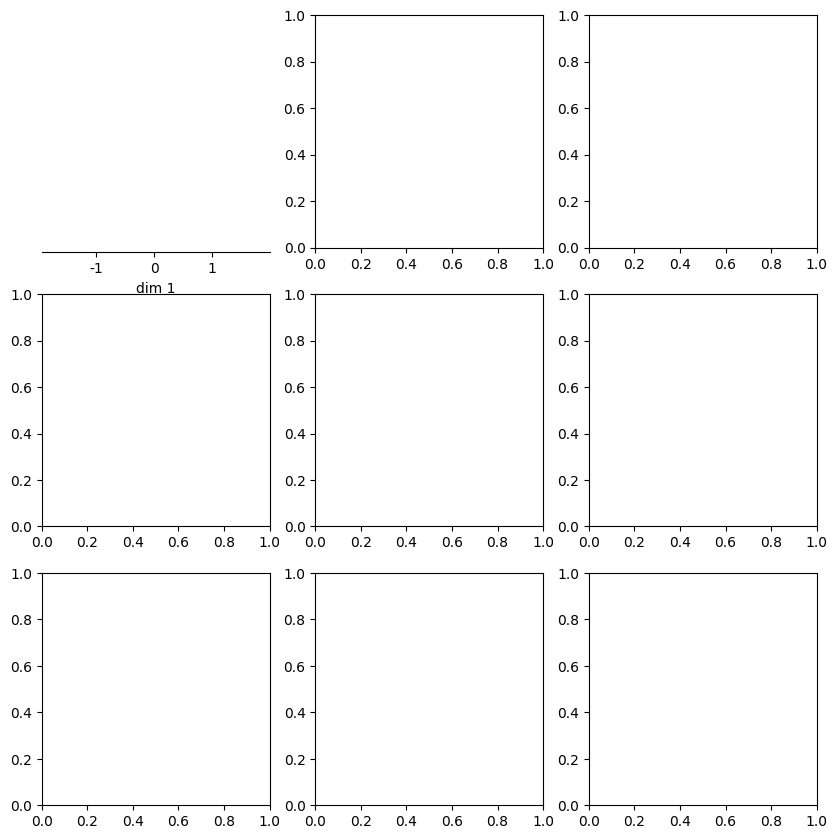

In [3]:
_ = pairplot(
    posterior_samples,
)

### Customisation

The pairplots are split into three regions, the diagonal (`diag`) and the upper and lower off-diagonal regions(`upper` and `lower`). We can pass seperate arguments (e.g. `hist`, `kde`, `scatter`) for each region, as well as corresponding style keywords in a dictionary (by using e.g. `upper_kwargs`). For overall figure stylisation one can use `fig_kwargs`.

To get a closer look at the potential options, have a look at the `_get_default_fig_kwargs`, `_get_default_diag_kwargs` and `_get_default_offdiag_kwargs` functions in [analysis/plot.py](https://github.com/sbi-dev/sbi/blob/961-pairplot/sbi/analysis/plot.py).

As illustrated below, we can directly use any `matplotlib` keywords (such as `cmap` for images) by passing them in the `mpl_kwargs` entry of `upper_kwargs` or `diag_kwargs`.


Lets now make a scatter plot for the upper diagonal, a histogram for the diagonal, and pass keyword dictionaries for both.

[ 1.3986685  -0.7446039   1.3975208   0.55488753 -0.61923933 -0.5043204
 -0.7632227   0.42458963  0.7670803   1.6235883  -0.3423171  -1.4629936
 -1.5936432   1.5348313  -1.8976374   0.9618256   1.0170648   0.60449076
 -0.11236    -1.6297925  -0.55854297  0.4646485   0.44657397 -1.9385726
  0.09436035 -1.4670997   0.01050305 -0.78253603  0.5948005  -1.4939783
  0.21170664 -0.6059425   1.0788589  -0.58006597 -0.65956855 -0.5739348
 -0.8772092   1.0566821   0.4891014   0.9072113   0.7648411   0.8372464
  0.651454    1.8354087   0.24027586  1.058738    0.4209535   1.9100947
  0.20456743  1.0025184  -1.2744031   0.78240633  1.5095115  -0.10111666
 -0.5342114   1.8496997   0.9557543  -0.23318624  1.6656082   0.39840722
  1.6775784   1.6748452  -1.4284182  -0.76851416 -0.34550452 -0.41813827
 -1.4345956   0.24812627  1.3050585   1.7715251   0.38866234  1.8615959
 -1.6918867   1.3933036  -0.5872493  -0.6113765  -0.60414267  1.9847872
  0.07342768  0.7674215  -0.7929511  -0.5042653  -1.6298435 

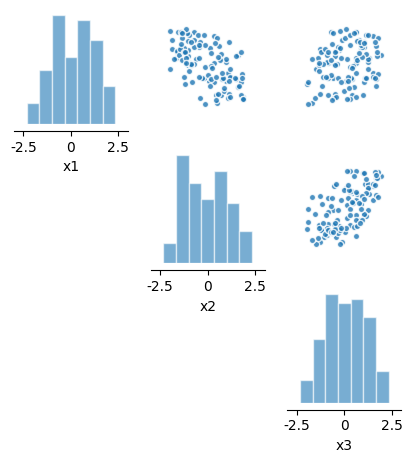

In [ ]:
_ = pairplot(
    posterior_samples, limits=[[-3,3]*3], figsize=(5, 5),
    diag="hist",
    upper="scatter",
    diag_kwargs={"mpl_kwargs":{"bins":10,
                                "color":'tab:blue',
                                "edgecolor":'white',
                                "linewidth":1,
                                "alpha":0.6,
                                "histtype":"bar",
                                "fill":True}},
    upper_kwargs={"mpl_kwargs": {"color":'tab:blue',
                                 "s":20,
                                 "alpha":.8}},
    labels=["x1", "x2", "x3"],
)

### Compare two sets of samples

By passing a list of sets of samples, we can plot two sets of samples on top of each other.

[ 1.8248494   0.8020394  -0.11906028  1.8970609   0.17751312 -1.2167342
 -0.94996    -0.69991183 -1.8379192  -0.20615768 -0.34271932 -1.800314
 -1.4708784   0.07559228  0.40551353 -1.4532204  -1.1789896  -1.8948672
 -0.5322993  -1.1592705 ]
tensor([-3,  3, -3,  3, -3,  3])
[-0.45710087  0.5302439  -0.17339349  0.9977441  -0.6021621  -1.6623499
  0.92401576  0.1025362  -0.0731461   0.2734282  -0.29193997 -1.508975
  0.5116141  -0.7896426  -0.71936965 -0.78943825 -0.0699861  -0.10698152
  0.7921841   0.49053526]
tensor([-3,  3, -3,  3, -3,  3])
[-0.8249061   0.7382684  -1.4983253  -1.3990123  -0.5689342   1.6381807
 -0.48836303  1.915504    1.5711498  -0.00857306 -0.97983384  0.7465427
  0.18902063 -1.6858397   1.2698545   1.3291795   0.18873215  0.16603088
  1.9766691  -0.24359536]
tensor([-3,  3, -3,  3, -3,  3])
[-0.24383163  0.4314375   0.00333357 -1.6501896  -1.4875562   0.21630955
 -0.1617558   1.5604336   0.15290093 -1.3955586  -0.5264859   0.09244823
 -0.8017788  -0.8197944   0.8

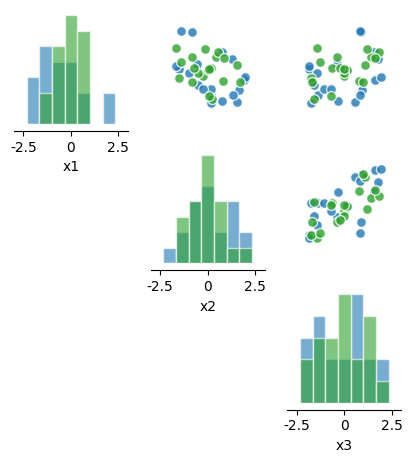

In [ ]:
# draw two different subsets of samples to plot
posterior_samples1 = posterior.sample((20,))
posterior_samples2 = posterior.sample((20,))

_ = pairplot(
    [posterior_samples1,posterior_samples2], limits=[[-3,3]*3], figsize=(5, 5),
    diag=["hist","hist"],
    upper=["scatter","scatter"],
    diag_kwargs={"mpl_kwargs":{"bins":10,
                                "edgecolor":'white',
                                "linewidth":1,
                                "alpha":0.6,
                                "histtype":"bar",
                                "fill":True}},
    upper_kwargs={"mpl_kwargs": {"s":50,
                                 "alpha":.8}},
    labels=["x1", "x2", "x3"],
)

### Multi-layered plots

We can use the same functionality to make a multi-layered plot using the same set of samples, e.g. a kernel-density estimate on top of scatter plot.

[ 1.3986685  -0.7446039   1.3975208   0.55488753 -0.61923933 -0.5043204
 -0.7632227   0.42458963  0.7670803   1.6235883  -0.3423171  -1.4629936
 -1.5936432   1.5348313  -1.8976374   0.9618256   1.0170648   0.60449076
 -0.11236    -1.6297925  -0.55854297  0.4646485   0.44657397 -1.9385726
  0.09436035 -1.4670997   0.01050305 -0.78253603  0.5948005  -1.4939783
  0.21170664 -0.6059425   1.0788589  -0.58006597 -0.65956855 -0.5739348
 -0.8772092   1.0566821   0.4891014   0.9072113   0.7648411   0.8372464
  0.651454    1.8354087   0.24027586  1.058738    0.4209535   1.9100947
  0.20456743  1.0025184  -1.2744031   0.78240633  1.5095115  -0.10111666
 -0.5342114   1.8496997   0.9557543  -0.23318624  1.6656082   0.39840722
  1.6775784   1.6748452  -1.4284182  -0.76851416 -0.34550452 -0.41813827
 -1.4345956   0.24812627  1.3050585   1.7715251   0.38866234  1.8615959
 -1.6918867   1.3933036  -0.5872493  -0.6113765  -0.60414267  1.9847872
  0.07342768  0.7674215  -0.7929511  -0.5042653  -1.6298435 

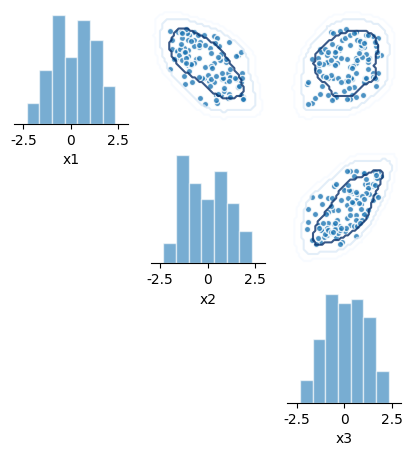

In [ ]:
_ = pairplot(
    [posterior_samples,posterior_samples], limits=[[-3,3]*3], figsize=(5, 5),
    diag=["hist",None],
    upper=["scatter","contour"],
    diag_kwargs={"mpl_kwargs":{"bins":10,
                                "color":'tab:blue',
                                "edgecolor":'white',
                                "linewidth":1,
                                "alpha":0.6,
                                "histtype":"bar",
                                "fill":True},},
    upper_kwargs=[{"mpl_kwargs": {"color":'tab:blue',
                                  "s":20,
                                  "alpha":.8},},
                  {"mpl_kwargs": {"cmap":'Blues_r',
                                  "alpha":.8,
                                  "colors":None}}],
    labels=["x1", "x2", "x3"],
            fig_kwargs={"despine":{"offset":0}}
)

### Lower diagonal

We can add something in the lower off-diagonal as well.

[ 1.3986685  -0.7446039   1.3975208   0.55488753 -0.61923933 -0.5043204
 -0.7632227   0.42458963  0.7670803   1.6235883  -0.3423171  -1.4629936
 -1.5936432   1.5348313  -1.8976374   0.9618256   1.0170648   0.60449076
 -0.11236    -1.6297925  -0.55854297  0.4646485   0.44657397 -1.9385726
  0.09436035 -1.4670997   0.01050305 -0.78253603  0.5948005  -1.4939783
  0.21170664 -0.6059425   1.0788589  -0.58006597 -0.65956855 -0.5739348
 -0.8772092   1.0566821   0.4891014   0.9072113   0.7648411   0.8372464
  0.651454    1.8354087   0.24027586  1.058738    0.4209535   1.9100947
  0.20456743  1.0025184  -1.2744031   0.78240633  1.5095115  -0.10111666
 -0.5342114   1.8496997   0.9557543  -0.23318624  1.6656082   0.39840722
  1.6775784   1.6748452  -1.4284182  -0.76851416 -0.34550452 -0.41813827
 -1.4345956   0.24812627  1.3050585   1.7715251   0.38866234  1.8615959
 -1.6918867   1.3933036  -0.5872493  -0.6113765  -0.60414267  1.9847872
  0.07342768  0.7674215  -0.7929511  -0.5042653  -1.6298435 

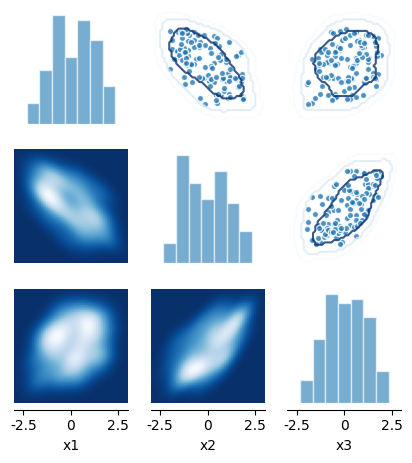

In [ ]:
_ = pairplot(
    [posterior_samples,posterior_samples], limits=[[-3,3]*3], figsize=(5, 5),
    diag=["hist",None],
    upper=["scatter","contour"],
    lower =["kde",None],
    diag_kwargs={"mpl_kwargs":{"bins":10,
                                "color":'tab:blue',
                                "edgecolor":'white',
                                "linewidth":1,
                                "alpha":0.6,
                                "histtype":"bar",
                                "fill":True}},
    upper_kwargs=[{"mpl_kwargs": {"color":'tab:blue',
                                  "s":20,
                                  "alpha":.8}},
                  {"mpl_kwargs": {"cmap":'Blues_r',
                                  "alpha":.8,
                                  "colors":None}}],
    lower_kwargs={"mpl_kwargs": {"cmap":"Blues_r"}},
    labels=["x1", "x2", "x3"],
)

### Adding observed data

We can also add points, e.g., our observed data `x_o` to the plot.

[ 1.3986685  -0.7446039   1.3975208   0.55488753 -0.61923933 -0.5043204
 -0.7632227   0.42458963  0.7670803   1.6235883  -0.3423171  -1.4629936
 -1.5936432   1.5348313  -1.8976374   0.9618256   1.0170648   0.60449076
 -0.11236    -1.6297925  -0.55854297  0.4646485   0.44657397 -1.9385726
  0.09436035 -1.4670997   0.01050305 -0.78253603  0.5948005  -1.4939783
  0.21170664 -0.6059425   1.0788589  -0.58006597 -0.65956855 -0.5739348
 -0.8772092   1.0566821   0.4891014   0.9072113   0.7648411   0.8372464
  0.651454    1.8354087   0.24027586  1.058738    0.4209535   1.9100947
  0.20456743  1.0025184  -1.2744031   0.78240633  1.5095115  -0.10111666
 -0.5342114   1.8496997   0.9557543  -0.23318624  1.6656082   0.39840722
  1.6775784   1.6748452  -1.4284182  -0.76851416 -0.34550452 -0.41813827
 -1.4345956   0.24812627  1.3050585   1.7715251   0.38866234  1.8615959
 -1.6918867   1.3933036  -0.5872493  -0.6113765  -0.60414267  1.9847872
  0.07342768  0.7674215  -0.7929511  -0.5042653  -1.6298435 

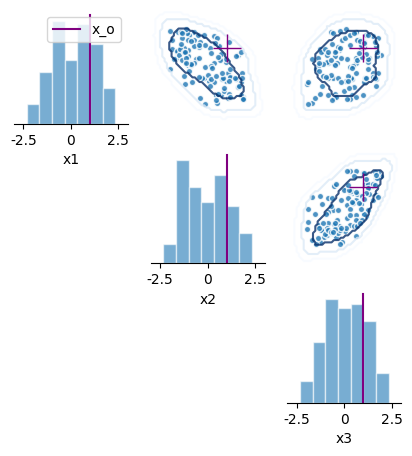

In [ ]:
# fake observed data:
x_o = torch.ones(1,3)

_ = pairplot(
    [posterior_samples,posterior_samples], limits=[[-3,3]*3], figsize=(5, 5),
    diag=["hist",None],
    upper=["scatter","contour"],
    diag_kwargs={"mpl_kwargs":{"bins":10,
                                "color":'tab:blue',
                                "edgecolor":'white',
                                "linewidth":1,
                                "alpha":0.6,
                                "histtype":"bar",
                                "fill":True}},
    upper_kwargs=[{"mpl_kwargs": {"color":'tab:blue',
                                  "s":20,
                                  "alpha":.8}},
                  {"mpl_kwargs": {"cmap":'Blues_r',
                                  "alpha":.8,
                                  "colors":None}}],
    labels=["x1", "x2", "x3"],
    points = x_o,
    fig_kwargs={"points_labels": ["x_o"],
                "legend":True,
                "points_colors":["purple"],
                "points_offdiag" : {"marker":"+", "markersize":20},
                "despine":{"offset":0}},
)

### Subsetting the plot

For high-dimensional posteriors, we might only want to visualise a subset, this can by passing a list of entries to plot to the `subset` argument of the `pairplot` function.

[ 1.3986685  -0.7446039   1.3975208   0.55488753 -0.61923933 -0.5043204
 -0.7632227   0.42458963  0.7670803   1.6235883  -0.3423171  -1.4629936
 -1.5936432   1.5348313  -1.8976374   0.9618256   1.0170648   0.60449076
 -0.11236    -1.6297925  -0.55854297  0.4646485   0.44657397 -1.9385726
  0.09436035 -1.4670997   0.01050305 -0.78253603  0.5948005  -1.4939783
  0.21170664 -0.6059425   1.0788589  -0.58006597 -0.65956855 -0.5739348
 -0.8772092   1.0566821   0.4891014   0.9072113   0.7648411   0.8372464
  0.651454    1.8354087   0.24027586  1.058738    0.4209535   1.9100947
  0.20456743  1.0025184  -1.2744031   0.78240633  1.5095115  -0.10111666
 -0.5342114   1.8496997   0.9557543  -0.23318624  1.6656082   0.39840722
  1.6775784   1.6748452  -1.4284182  -0.76851416 -0.34550452 -0.41813827
 -1.4345956   0.24812627  1.3050585   1.7715251   0.38866234  1.8615959
 -1.6918867   1.3933036  -0.5872493  -0.6113765  -0.60414267  1.9847872
  0.07342768  0.7674215  -0.7929511  -0.5042653  -1.6298435 

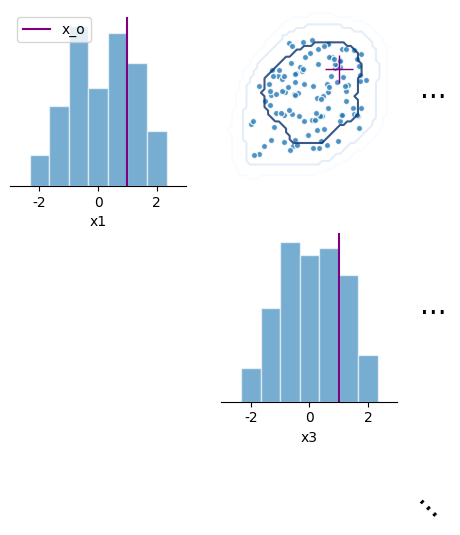

In [ ]:
_ = pairplot(
    [posterior_samples,posterior_samples], limits=[[-3,3]*3], figsize=(5, 5),
    subset=[0,2],
    diag=["hist",None],
    upper=["scatter","contour"],
    diag_kwargs={"mpl_kwargs":{"bins":10,
                                "color":'tab:blue',
                                "edgecolor":'white',
                                "linewidth":1,
                                "alpha":0.6,
                                "histtype":"bar",
                                "fill":True}},
    upper_kwargs=[{"mpl_kwargs": {"color":'tab:blue',
                                  "s":20,
                                  "alpha":.8}},
                  {"mpl_kwargs": {"cmap":'Blues_r',
                                  "alpha":.8,
                                  "colors":None}}],
    labels=["x1", "x2", "x3"],
    points = x_o,
    fig_kwargs={"points_labels": ["x_o"],
                "legend":True,
                "points_colors":["purple"],
                "points_offdiag" : {"marker":"+", "markersize":20},
                "despine":{"offset":0}},
)

### Plot just the marginals

1D Marginals can also be visualised using the `marginal_plot` function

[-0.7342243   0.08851814 -1.8732224  -1.043807    1.4810476  -1.2529254
  0.9632907  -0.60200953 -1.6237977   0.35823727  1.0844073   0.69716096
  1.8805468  -1.3247011   0.46993327 -1.8651943   0.12449765  1.5755529
 -1.95877    -0.38535285 -0.20603299 -0.4542365   0.6720221  -0.13069773
 -1.0523987   1.7747624  -0.1456275   1.752814    1.5104377   0.42919922
 -0.9019382  -0.2164011   0.594193   -0.28290582  0.74700713  1.1885448
 -1.2128799  -0.4527824  -1.6605492  -1.0184655  -1.2642481  -1.6162066
 -1.4922113  -1.5628498   0.9594462  -1.3797178  -1.7933123  -1.9969139
  0.32805014 -1.2592225   0.85003924  1.7674584   0.47639203  1.1938746
  1.1727552  -0.7427249  -1.4460757  -0.9857178  -0.97416806  0.9690583
 -0.48620582 -0.17998838  0.5527859   0.34481525  1.7955732  -0.00408483
  1.1433496  -1.1585345  -0.3794515  -1.0599434   0.6513026  -1.4171538
  1.8643475  -1.0355806   1.7839622   0.16509008  0.8289044  -1.1450024
  0.17266846 -1.2491183  -0.8207643   0.45391607  1.0737078 

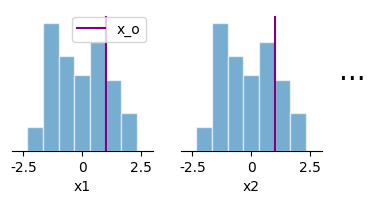

In [ ]:
# plot posterior samples
_ = marginal_plot(
    [posterior_samples,posterior_samples], limits=[[-3,3]*3],
    subset=[0,1],
    diag=["hist",None],
    diag_kwargs={"mpl_kwargs":{"bins":10,
                                "color":'tab:blue',
                                "edgecolor":'white',
                                "linewidth":1,
                                "alpha":0.6,
                                "histtype":"bar",
                                "fill":True},},
    labels=["x1", "x2", "x3"],
    points = [torch.ones(1, 3)],
    figsize=(4, 2),
    fig_kwargs={"points_labels": ["x_o"],
                "legend":True,
                "points_colors":["purple"],
                "points_offdiag" : {"marker":"+", "markersize":20},
                "despine":{"offset":0}},
)